An analysis about data: covid amount in a certain period from 1/22/2020 to 4/02/2020. We focus on the data in China's areas to see the spread speed.
Mutiple analytical and statistic methods have been applied.


* Provide the equivalent R code of the entire work.

# load data

### Python

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ysu7/csv/main/time_series_covid19_confirmed_global.csv')

In [ ]:
df.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,74,84,94,110,110,120,170,174,237,273
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,123,146,174,186,197,212,223,243,259,277


### R Code done

In [ ]:
# Load the required library if it's not already loaded

## install.packages("readr") # Uncomment and run this line to install the package if needed
## install.packages("dplyr") # Uncomment and run this line to install the package if needed
library(readr)
library(dplyr)

# Read the CSV file into a data frame
df <- read.csv('time_series_covid19_confirmed_global.csv')

In [ ]:
head(df, 2)

,Province.State,Country.Region,Lat,Long,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,⋯,X3.24.20,X3.25.20,X3.26.20,X3.27.20,X3.28.20,X3.29.20,X3.30.20,X3.31.20,X4.1.20,X4.2.20
,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,⋯,74,84,94,110,110,120,170,174,237,273
2,,Albania,41.1533,20.1683,0,0,0,0,0,0,⋯,123,146,174,186,197,212,223,243,259,277


# Get only China's data
Data shows daily accumulation of confirmed cases from 01/22/2020 to 04/02/2020

## Python

In [ ]:
groups = df.groupby('Country/Region')
China = groups.get_group('China')
China.head(2)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
49,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
50,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,558,561,566,569,573,577,577,580,580,582


## R Code done

In [ ]:
# Group by Country.Region
df_grouped <- df %>%
  group_by(`Country.Region`)

China <- df_grouped %>%
  filter(`Country.Region` == 'China') %>% # Extract the group for 'China'
  select(`Country.Region`, everything())  # Include 'Country.Region' in the result

# Display the top 2 rows
head(China,2)

Country.Region,Province.State,Lat,Long,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,⋯,X3.24.20,X3.25.20,X3.26.20,X3.27.20,X3.28.20,X3.29.20,X3.30.20,X3.31.20,X4.1.20,X4.2.20
<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
China,Anhui,31.8257,117.2264,1,9,15,39,60,70,⋯,990,990,990,990,990,990,990,990,990,990
China,Beijing,40.1824,116.4142,14,22,36,41,68,80,⋯,558,561,566,569,573,577,577,580,580,582


## Discard Country/region, Lat and Long columns

### Python

In [ ]:
China_2 = China.drop(['Country/Region', 'Lat','Long' ], axis=1)
China_2.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
49,Anhui,1,9,15,39,60,70,106,152,200,...,990,990,990,990,990,990,990,990,990,990
50,Beijing,14,22,36,41,68,80,91,111,114,...,558,561,566,569,573,577,577,580,580,582
51,Chongqing,6,9,27,57,75,110,132,147,182,...,578,578,578,578,578,579,579,579,579,579
52,Fujian,1,5,10,18,35,59,80,84,101,...,318,322,328,331,337,338,340,343,345,345
53,Gansu,0,2,2,4,7,14,19,24,26,...,136,136,136,136,136,138,138,138,138,138


### R Code done

In [ ]:
# Drop columns 'Country/Region', 'Lat', and 'Long'
China_2 <- China[, !(names(China) %in% c('Country.Region', 'Lat', 'Long'))]

In [ ]:
head(China_2)

Province.State,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,X1.28.20,X1.29.20,X1.30.20,⋯,X3.24.20,X3.25.20,X3.26.20,X3.27.20,X3.28.20,X3.29.20,X3.30.20,X3.31.20,X4.1.20,X4.2.20
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Anhui,1,9,15,39,60,70,106,152,200,⋯,990,990,990,990,990,990,990,990,990,990
Beijing,14,22,36,41,68,80,91,111,114,⋯,558,561,566,569,573,577,577,580,580,582
Chongqing,6,9,27,57,75,110,132,147,182,⋯,578,578,578,578,578,579,579,579,579,579
Fujian,1,5,10,18,35,59,80,84,101,⋯,318,322,328,331,337,338,340,343,345,345
Gansu,0,2,2,4,7,14,19,24,26,⋯,136,136,136,136,136,138,138,138,138,138
Guangdong,26,32,53,78,111,151,207,277,354,⋯,1428,1433,1448,1456,1467,1475,1484,1494,1501,1507


### Compute daily confirmed cases by provinces

#### Python

In [ ]:
# get only the values of cases
# from day 1 to one before lsat day
X1 = China_2.iloc[:,1:-1].values
# from day 2 to last day
X2 = China_2.iloc[:,2:].values
# compute the difference (case_day_i - cases_day_(i-1))
daily_cases = X2-X1
print(daily_cases)

[[ 8  6 24 ...  0  0  0]
 [ 8 14  5 ...  3  0  2]
 [ 3 18 30 ...  0  0  0]
 ...
 [ 2  0  1 ...  0  0  0]
 [ 1  3  6 ...  2  0  1]
 [17 16 19 ...  2  0  1]]


In [ ]:
# Save the daily cases (daily_cases) in a new dataframe
col_names = China_2.columns
provinces = col_names[0]
days = col_names[1:]
day_1 = days[0]
other_days = days[1:]

In [ ]:
China_dc = pd.DataFrame()
China_dc['Province'] = China_2[provinces]
China_dc[day_1] = China_2[day_1]
China_dc[other_days] = daily_cases
China_dc.head(3)

,Province,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
49,Anhui,1,8,6,24,21,10,36,46,48,...,0,0,0,0,0,0,0,0,0,0
50,Beijing,14,8,14,5,27,12,11,20,3,...,21,3,5,3,4,4,0,3,0,2
51,Chongqing,6,3,18,30,18,35,22,15,35,...,0,0,0,0,0,1,0,0,0,0


#### R Code done

In [ ]:
# Extract the values for daily cases
X1 <- China_2[, -c(1, ncol(China_2))]  # From day 1 to second last day
X2 <- China_2[, -(1:2)] # From day 2 to the last day

# Compute the difference (cases_day_i - cases_day_(i-1))
daily_cases <- X2 - X1

day_1 = colnames(China_2)[2] # Get the first date from China_2

# Create a new data frame 'China_dc'
China_dc <- data.frame(
  Province = China_2$`Province.State`,
  day_1 = China_2[, day_1], # set the values for the first column "day 1" as it is
  daily_cases # now concatenate th values for the other days with daily cases
)

head(China_dc, 3)

,Province,X1.22.20,X1.23.20,X1.24.20,X1.25.20,X1.26.20,X1.27.20,X1.28.20,X1.29.20,X1.30.20,⋯,X3.24.20,X3.25.20,X3.26.20,X3.27.20,X3.28.20,X3.29.20,X3.30.20,X3.31.20,X4.1.20,X4.2.20
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,Anhui,1,8,6,24,21,10,36,46,48,⋯,0,0,0,0,0,0,0,0,0,0
2,Beijing,14,8,14,5,27,12,11,20,3,⋯,21,3,5,3,4,4,0,3,0,2
3,Chongqing,6,3,18,30,18,35,22,15,35,⋯,0,0,0,0,0,1,0,0,0,0


### Reset index to start from 0

#### Python

In [ ]:
China_dc = China_dc.reset_index(drop=True)
China_dc.head()

,Province,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20
0,Anhui,1,8,6,24,21,10,36,46,48,...,0,0,0,0,0,0,0,0,0,0
1,Beijing,14,8,14,5,27,12,11,20,3,...,21,3,5,3,4,4,0,3,0,2
2,Chongqing,6,3,18,30,18,35,22,15,35,...,0,0,0,0,0,1,0,0,0,0
3,Fujian,1,4,5,8,17,24,21,4,17,...,5,4,6,3,6,1,2,3,2,0
4,Gansu,0,2,0,2,3,7,5,5,2,...,0,0,0,0,0,2,0,0,0,0


#### R Code done

In [ ]:
# no need. In R, index starts from 1 for new data frame

# Province as columns and days as rows

### Python

In [ ]:
China_dc_val = China_dc.values
Province_names = China_dc_val[:,0]
Cases = China_dc_val[:,1:].T
#--------------------------- make a pandas frame ------------
China_dc_t = pd.DataFrame(Cases, columns = Province_names)
China_dc_t.head()

,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,...,Shaanxi,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Xinjiang,Yunnan,Zhejiang
0,1,14,6,1,0,26,2,1,4,1,...,0,2,9,1,5,4,0,0,1,10
1,8,8,3,4,2,6,3,2,1,0,...,3,4,7,0,3,0,0,2,1,17
2,6,14,18,5,0,21,18,0,3,1,...,2,9,4,0,7,4,0,0,3,16
3,24,5,30,8,2,25,0,1,11,6,...,10,12,13,5,13,2,0,1,6,19
4,21,27,18,17,3,33,13,1,3,5,...,7,19,7,3,16,4,0,1,5,42


### R Code done

In [ ]:
China_dc_val <- unname(China_dc[-1]) # get the values (daily cases)
Cases <- t(China_dc_val) # Transpose it
Province_names <- as.matrix(China_dc)[, 1] # Extract province names

In [ ]:
# Create a new datafrom
China_dc_t <- data.frame(Cases)
colnames(China_dc_t) <- Province_names

# display the first 6 rows
head(China_dc_t)

,Anhui,Beijing,Chongqing,Fujian,Gansu,Guangdong,Guangxi,Guizhou,Hainan,Hebei,⋯,Shaanxi,Shandong,Shanghai,Shanxi,Sichuan,Tianjin,Tibet,Xinjiang,Yunnan,Zhejiang
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,14,6,1,0,26,2,1,4,1,⋯,0,2,9,1,5,4,0,0,1,10
2,8,8,3,4,2,6,3,2,1,0,⋯,3,4,7,0,3,0,0,2,1,17
3,6,14,18,5,0,21,18,0,3,1,⋯,2,9,4,0,7,4,0,0,3,16
4,24,5,30,8,2,25,0,1,11,6,⋯,10,12,13,5,13,2,0,1,6,19
5,21,27,18,17,3,33,13,1,3,5,⋯,7,19,7,3,16,4,0,1,5,42
6,10,12,35,24,7,40,10,2,11,5,⋯,13,29,13,4,25,9,0,1,10,24


In [ ]:
dim(China_dc_t)

[1] 72 33

# Display daily confirmed cases

### Python

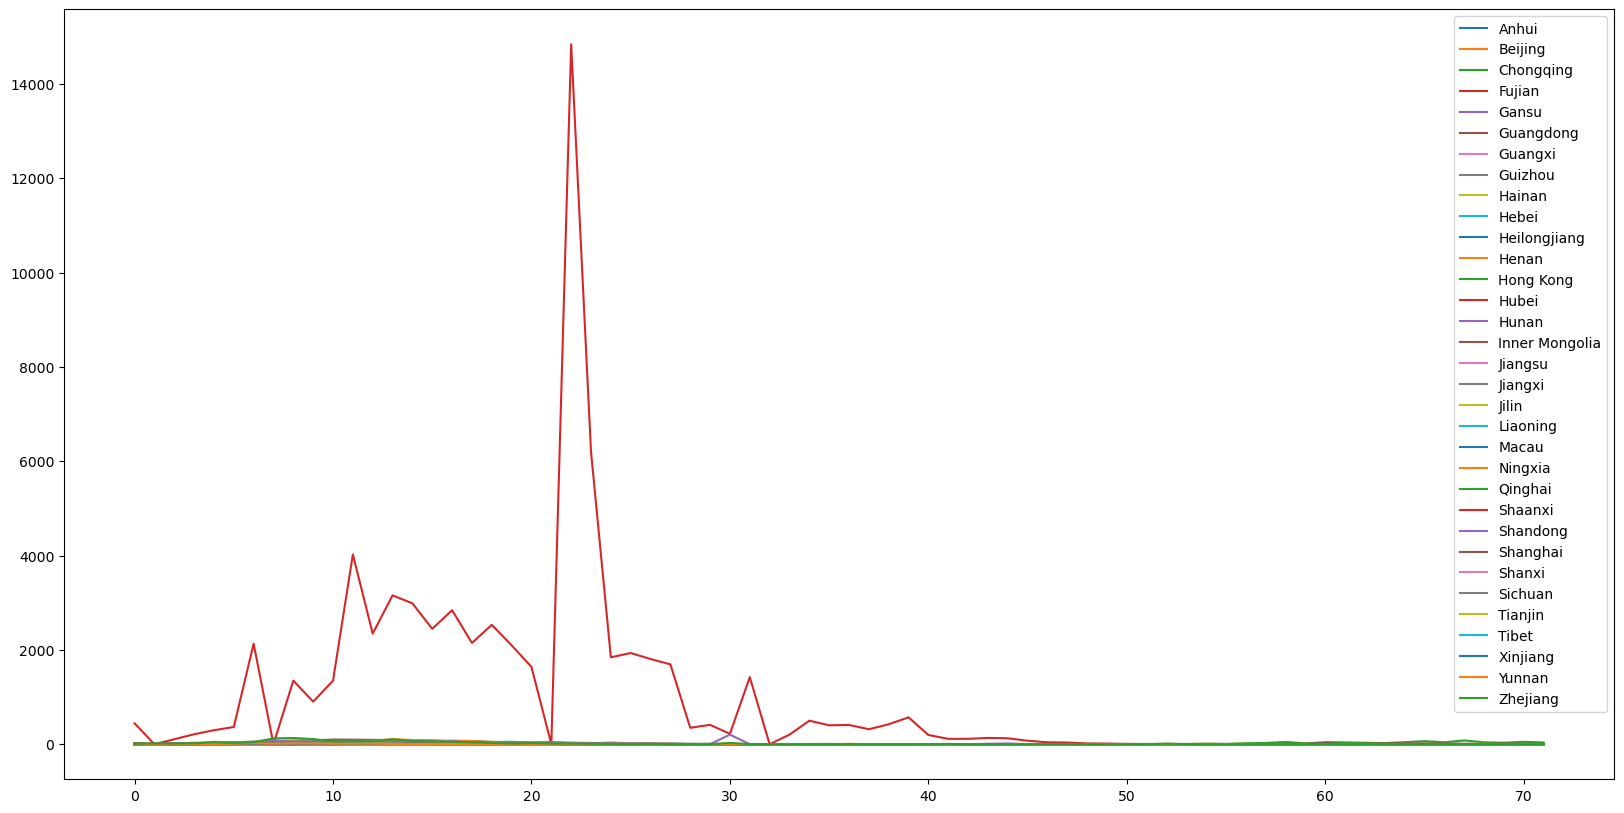

In [ ]:
import matplotlib.pyplot as plt
China_dc_t.plot(figsize=(20,10))
plt.show()

As shown Hubein province is a special case. Therefore, discard it from the data

### R Code done

In [ ]:
#退货row的数量
x_line = 1:nrow(China_dc_t)
x_max = nrow(China_dc_t)
y_max = max(China_dc_t)

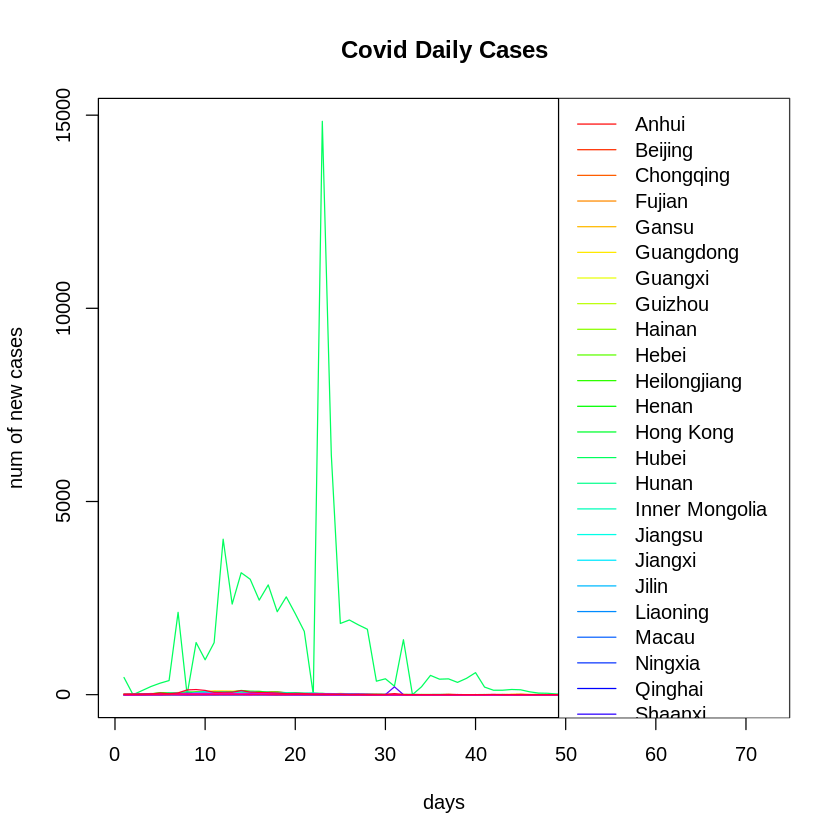

In [ ]:
# plot(x_line, China_dc_t$`Hong Kong`, type="l")
plot(1, xlim=c(1, x_max), ylim=c(0,y_max), type = "n", xlab="days", ylab="num of new cases", main="Covid Daily Cases") # create an empty plot

# Get the number of columns
num_columns <- ncol(China_dc_t)

# Generate a sequence of colors using rainbow() based on the number of columns
line_colors <- rainbow(num_columns)

# Loop through columns and add each as a line with a different color
for (i in 1:num_columns) {
  col_name <- colnames(China_dc_t)[i]
  line_color <- line_colors[i]
  lines(x_line, China_dc_t[, col_name], col = line_color)
}

# Add a legend
legend("topright", legend = colnames(China_dc_t), col = line_colors, lty = 1)

### Python

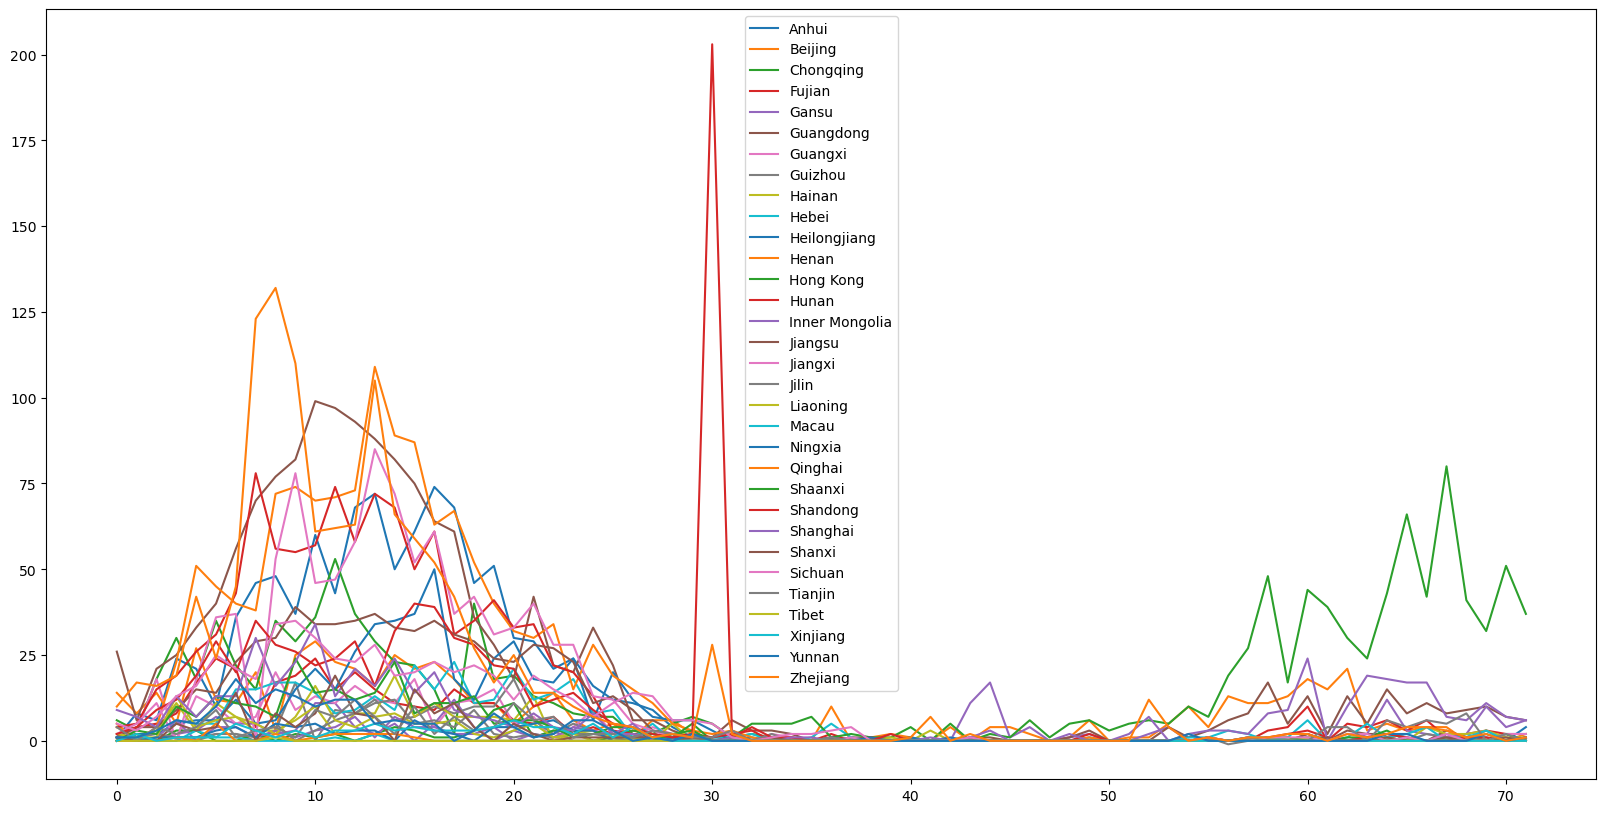

In [ ]:
# Discard Hubei province. It has huge number of cases
China_4 = China_dc_t.drop('Hubei', axis=1)
China_4.plot(figsize=(20,10))
plt.show()

### R Code

In [ ]:
# Remove the 'Hubei' column
China_4 <- China_dc_t[, !(colnames(China_dc_t) %in% 'Hubei')]

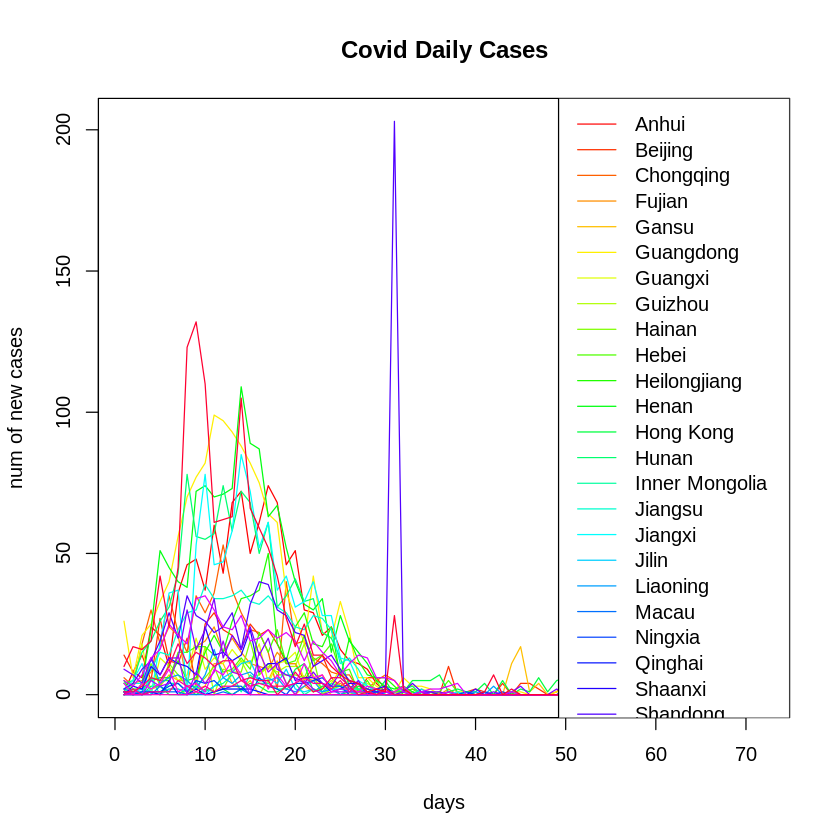

In [ ]:
# Create a line plot for the remaining provinces

x_line = 1:nrow(China_4)
x_max = nrow(China_4)
y_max = max(China_4)
plot(1, xlim=c(1, x_max), ylim=c(0,y_max), type = "n", xlab="days", ylab="num of new cases", main="Covid Daily Cases") # create an empty plot

# Get the number of columns
num_columns <- ncol(China_4)

# Generate a sequence of colors using rainbow() based on the number of columns
line_colors <- rainbow(num_columns)

# Loop through columns and add each as a line with a different color
for (i in 1:num_columns) {
  col_name <- colnames(China_4)[i]
  line_color <- line_colors[i]
  lines(x_line, China_4[, col_name], col = line_color)
}

# Add a legend
legend("topright", legend = colnames(China_4), col = line_colors, lty = 1)

# Correlation between provincess in terms of daily confirmed cases

## Python

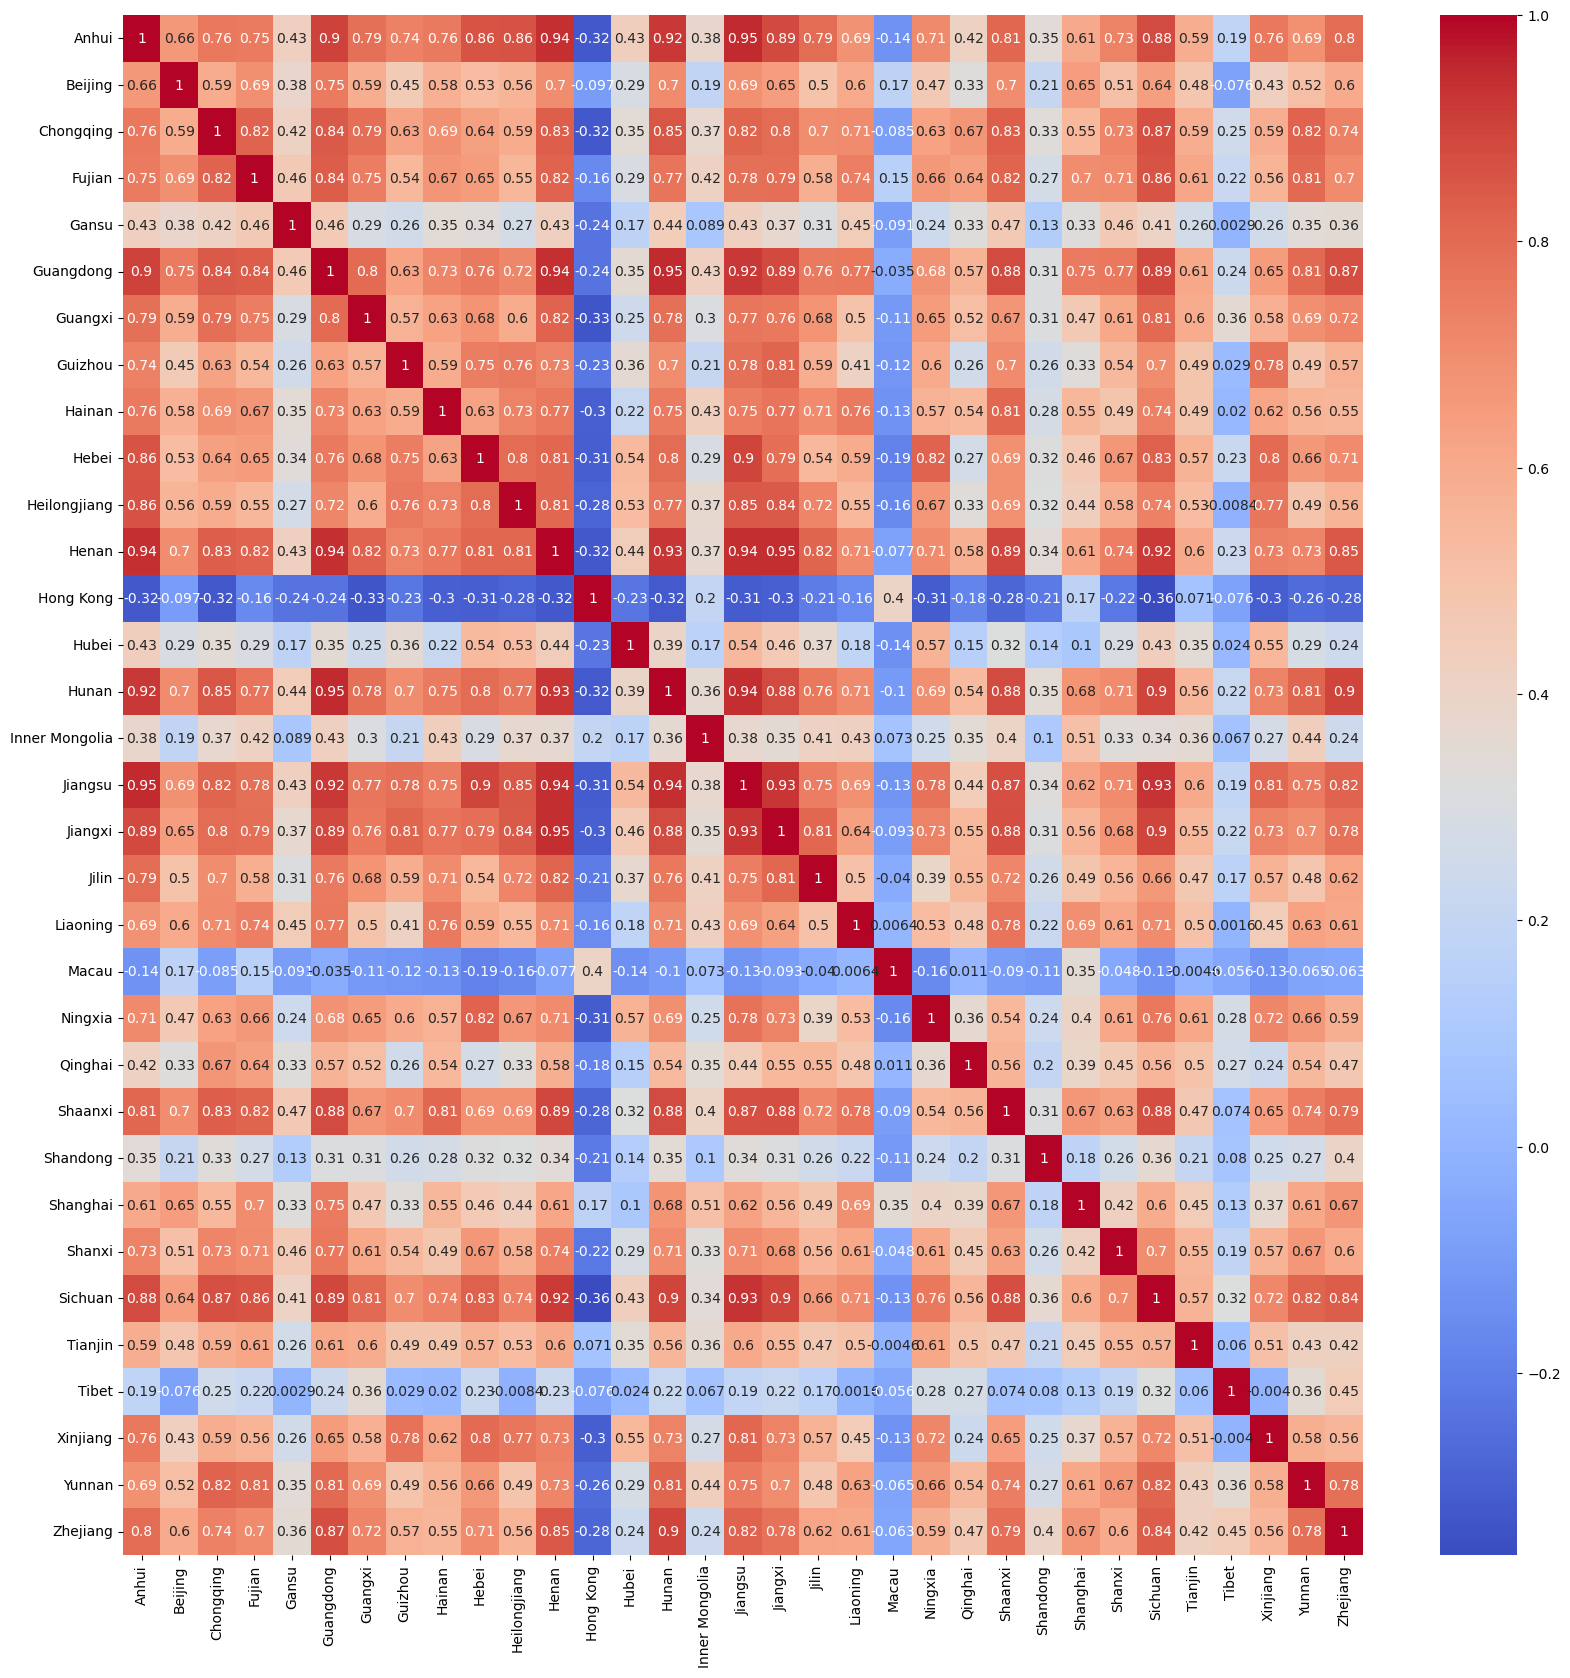

In [ ]:
# Correlation
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(China_dc_t.corr(numeric_only=False), annot= True, cmap='coolwarm')
plt.show()

## R Code done

In [ ]:
# Calculate the correlation matrix
correlation_matrix <- cor(China_dc_t, use = "pairwise.complete.obs")

In [ ]:
# Install and load pheatmap
install.packages("pheatmap")
library(pheatmap)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



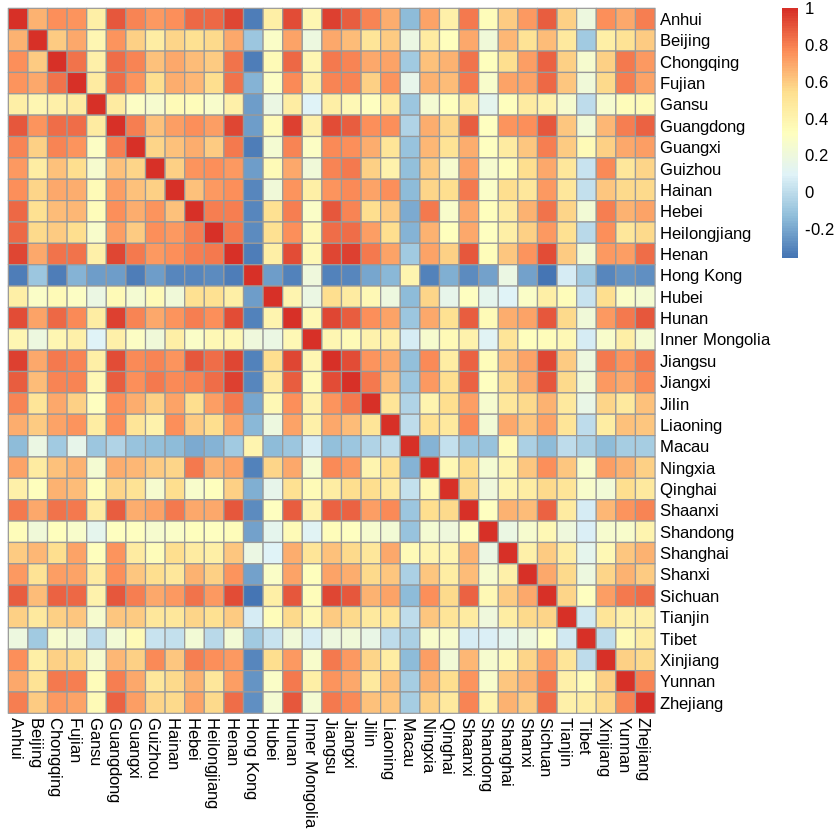

In [ ]:
# Create a heatmap
pheatmap(correlation_matrix, scale = "none", cluster_rows = FALSE, cluster_cols = FALSE)

### Sort the correlations

### Python

In [ ]:
correlation = China_dc_t.corr(numeric_only=False)
c = correlation.abs().unstack()
c.sort_values(ascending = False)[33:64][::2]

Anhui      Jiangsu      0.948884
Hunan      Guangdong    0.947127
Henan      Jiangxi      0.946075
Hunan      Jiangsu      0.943732
Jiangsu    Henan        0.941800
Guangdong  Henan        0.939586
Anhui      Henan        0.936565
Sichuan    Jiangsu      0.932564
Henan      Hunan        0.929992
Jiangxi    Jiangsu      0.929468
Hunan      Anhui        0.922236
Guangdong  Jiangsu      0.920927
Henan      Sichuan      0.919194
Guangdong  Anhui        0.902344
Hebei      Jiangsu      0.897629
Hunan      Zhejiang     0.896465
dtype: float64

### R Code done

In [ ]:
# Convert the correlation matrix to a data frame
correlation_matrix <- cor(China_dc_t, use = "pairwise.complete.obs")
correlation_df <- as.data.frame(as.table(correlation_matrix))

# Rename the columns for clarity
colnames(correlation_df) <- c("Column1", "Column2", "Correlation")

# Remove rows with the same value in Column1 and Column2 (self-correlation)
filtered_correlation_df <- subset(correlation_df, Column1 != Column2)

# Sort the data frame by correlation values in descending order
sorted_correlation_df <- filtered_correlation_df[order(-filtered_correlation_df$Correlation), ]

# Remove rows with swapped "Column1" and "Column2" values (duplicates)
unique_sorted_correlation_df <- sorted_correlation_df %>%
  filter(row_number() %% 2 != 0)

# Display the data frame with correlations
head(unique_sorted_correlation_df)

,Column1,Column2,Correlation
,<fct>,<fct>,<dbl>
1,Jiangsu,Anhui,0.9488838
2,Hunan,Guangdong,0.9471269
3,Jiangxi,Henan,0.9460755
4,Jiangsu,Hunan,0.9437320
5,Jiangsu,Henan,0.9417998
6,Henan,Guangdong,0.9395862


### PCA
* Assume the days are the variables and the provinces are the instances
* Apply PCA and show the scatter of the first 3 PC.

#### Python

In [ ]:
# Get the values
X = China_dc[days].values
print(X)

[[ 1  8  6 ...  0  0  0]
 [14  8 14 ...  3  0  2]
 [ 6  3 18 ...  0  0  0]
 ...
 [ 0  2  0 ...  0  0  0]
 [ 1  1  3 ...  2  0  1]
 [10 17 16 ...  2  0  1]]


In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

pca.fit(X)
# transform data
X_reduced = pca.transform(X)
X_reduced.shape

(33, 3)

#### R Code done

In [ ]:
# get the values (daily cases)
X <- unname(China_dc[-1])

# Perform PCA with 3 components
pca <- prcomp(X, center = TRUE, scale. = TRUE, rank. = 3)

# Transform the data
X_reduced <- pca$x

# Print the shape of X_reduced
dim(X_reduced)

[1] 33  3

#### Python

In [ ]:
exp_var = pca.explained_variance_ratio_
cumul_var = np.cumsum(exp_var)
exp_var_ratio = pca.explained_variance_ratio_

In [ ]:
print('Explained variances: ',exp_var)
print('Cumulative variances: ',cumul_var)
print('Ratio explained variances: ', exp_var_ratio)

Explained variances:  [9.99161637e-01 5.16487694e-04 1.18391188e-04]
Cumulative variances:  [0.99916164 0.99967812 0.99979652]
Ratio explained variances:  [9.99161637e-01 5.16487694e-04 1.18391188e-04]


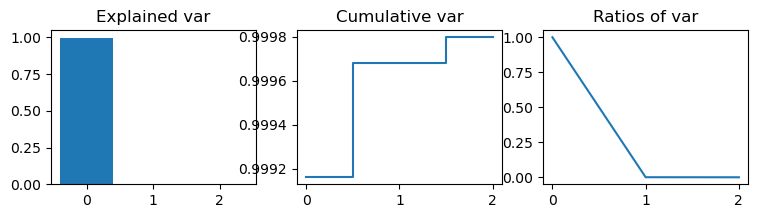

In [ ]:
plt.figure(figsize=(9,2))
plt.subplot(1,3,1)
plt.bar(range(0,len(exp_var)), exp_var)
plt.title('Explained var')
plt.subplot(1,3,2)
plt.step(range(0,len(exp_var)), cumul_var, where='mid')
plt.title('Cumulative var')
plt.subplot(1,3,3)
plt.plot(exp_var_ratio)
plt.title('Ratios of var')
plt.show()

#### R Code done

Explained variance ratio = how much of the total variance in your data is explained by each principal component in a Principal Component Analysis (PCA).

Explained Variance Ratio (i-th component) = Variance (i-th component) / Total Variance

In [ ]:
exp_var <- pca$sdev[1:3]^2 # get the first three standard deviation from pca and square them
cumul_var <- cumsum(exp_var)
exp_var_ratio <- exp_var / sum(exp_var)

In [ ]:
cat("Explained variances: ", exp_var, "\n")
cat("Cumulative variances: ", cumul_var, "\n")
cat("Ratio explained variances: ", exp_var_ratio, "\n")

Explained variances:  46.43526 17.61294 2.850234 
Cumulative variances:  46.43526 64.0482 66.89843 
Ratio explained variances:  0.6941158 0.2632788 0.04260539 


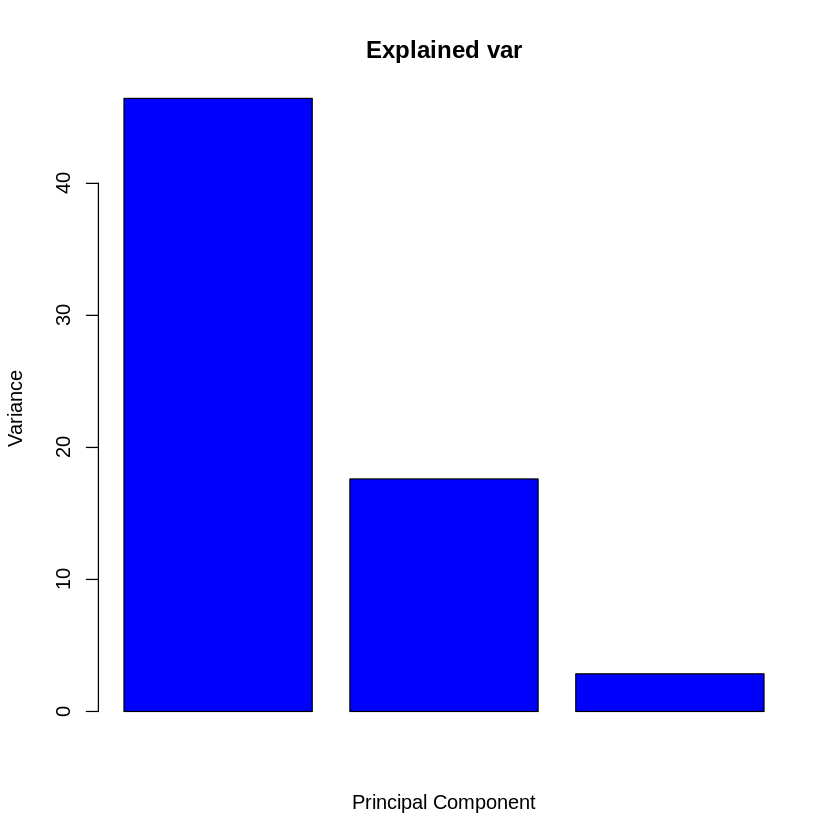

In [ ]:
# Plot the Explained Variance
barplot(exp_var, main="Explained var", xlab="Principal Component", ylab="Variance", col="blue")

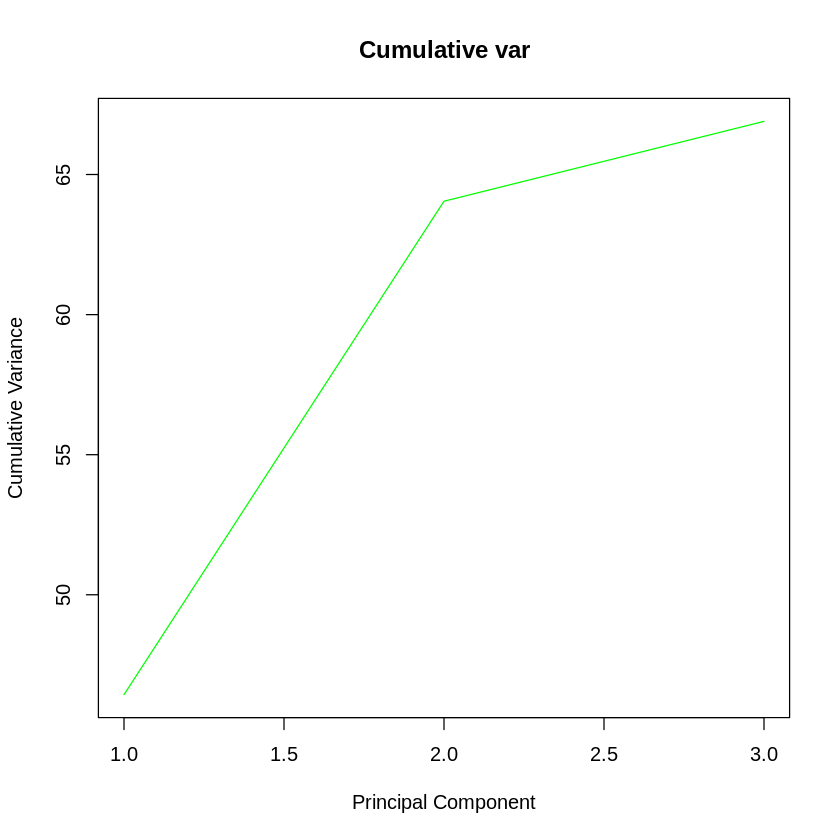

In [ ]:
# Plot the Cumulative Variance
plot(cumul_var, type="l", main="Cumulative var", xlab="Principal Component", ylab="Cumulative Variance", col="green")

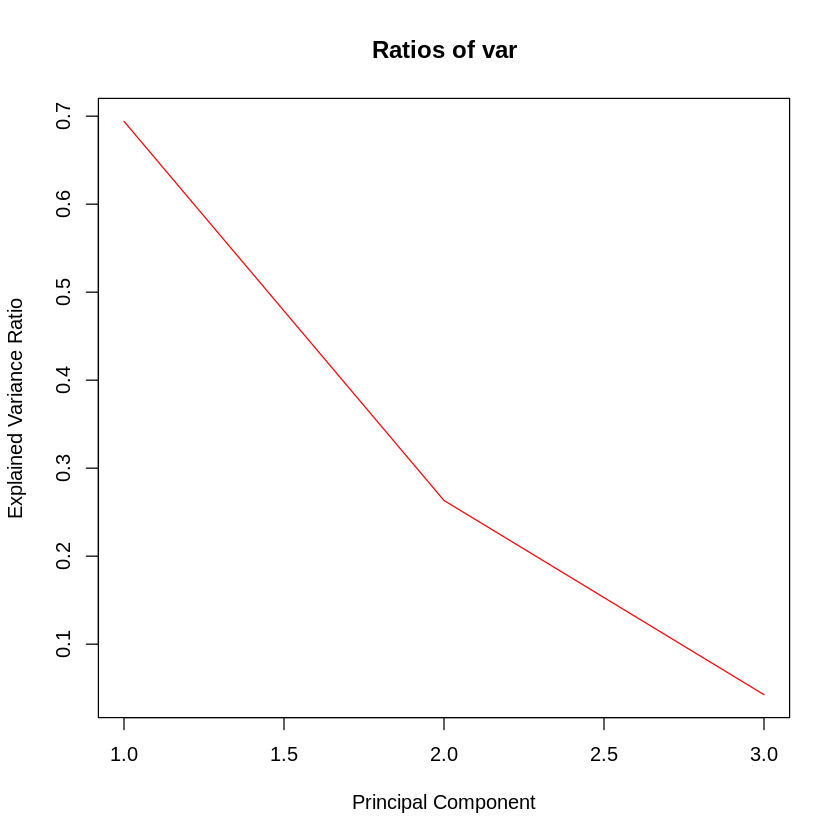

In [ ]:
# Plot the Ratios of Variance
plot(exp_var_ratio, type="l", main="Ratios of var", xlab="Principal Component", ylab="Explained Variance Ratio", col="red")

### Save the PCA vales in a DataFrame

#### Python

In [ ]:
# save X_s in a dataframe
X_reduced_df = pd.DataFrame(data=X_reduced)
X_reduced_df.columns = ['w1', 'w2', 'w3']
X_reduced_df.head(5)

,w1,w2,w3
0,-496.977429,101.301488,-11.812384
1,-572.313074,-8.321902,-8.183773
2,-556.370960,24.567849,-4.004067
3,-586.911842,-19.065950,-6.718658
4,-607.252647,-53.302153,-2.534793


#### R Code done

In [ ]:
# Create a data frame from X_reduced
X_reduced_df <- as.data.frame(X_reduced)

# Assign column names
colnames(X_reduced_df) <- c('w1', 'w2', 'w3')

# Print the first 5 rows of the data frame
head(X_reduced_df, 5)

,w1,w2,w3
,<dbl>,<dbl>,<dbl>
1,-1.1179331,1.657240,1.7601133
2,-0.3450488,-5.096852,2.0407608
3,-1.0246120,1.417989,0.1065073
4,-1.3559512,0.147501,-0.4274832
5,-0.9636301,1.005906,-0.1868563


### Display the scatter of data using 1st three PC

#### Python

Text(0.5, 0, 'w3')

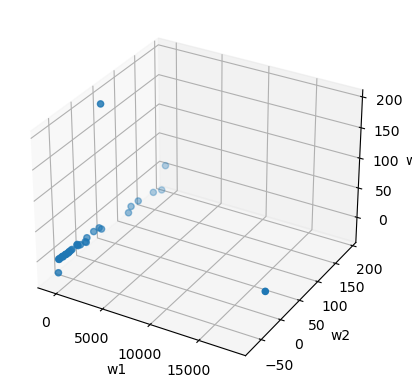

In [ ]:
# 3D plot
plot3d = plt.axes (projection='3d')
x = X_reduced_df['w1'].values
y = X_reduced_df['w2'].values
z = X_reduced_df['w3'].values
plot3d.scatter3D (x, y, z)
plot3d.set_xlabel ('w1')
plot3d.set_ylabel ('w2')
plot3d.set_zlabel ('w3')

#### R Code done

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in title(main = "3D Scatter Plot", xlab = xlabel, ylab = ylabel, :
“"zlab" is not a graphical parameter”


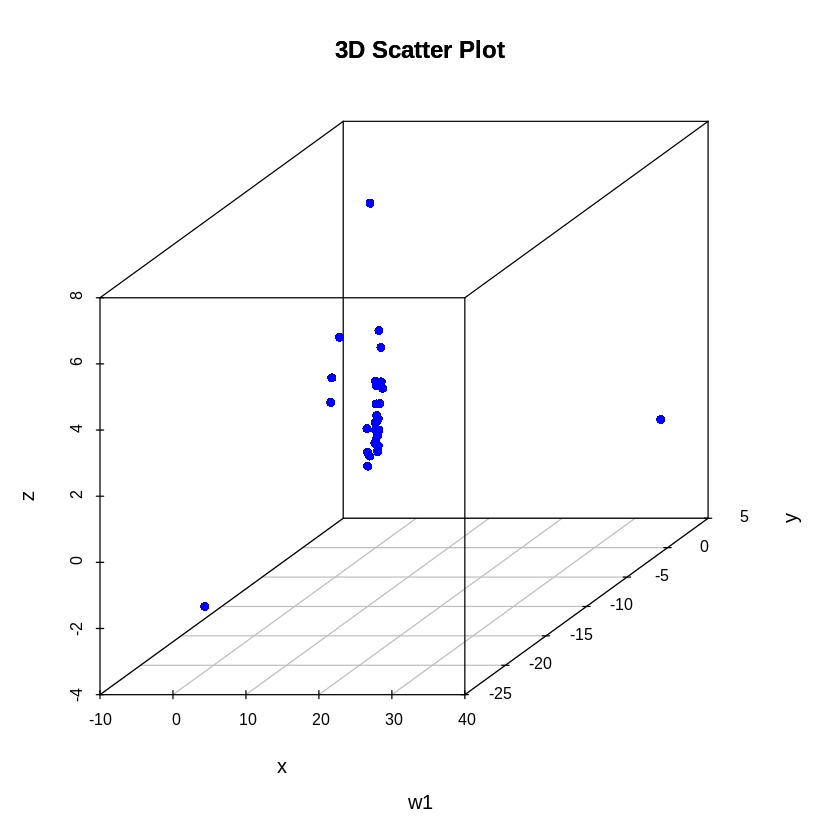

In [ ]:
# Load the scatterplot3d package if not already loaded
install.packages("scatterplot3d")
library(scatterplot3d)

# Set x, y, z data from X_reduced
x <- X_reduced_df$w1
y <- X_reduced_df$w2
z <- X_reduced_df$w3

# Create a 3D scatter plot
scatterplot3d(x, y, z, color = "blue", pch = 16, main = "3D Scatter Plot")

# Label the axes
xlabel <- "w1"
ylabel <- "w2"
zlabel <- "w3"
title(main = "3D Scatter Plot", xlab = xlabel, ylab = ylabel, zlab = zlabel)


### Plot the scatter of data using two of the PC

#### Python

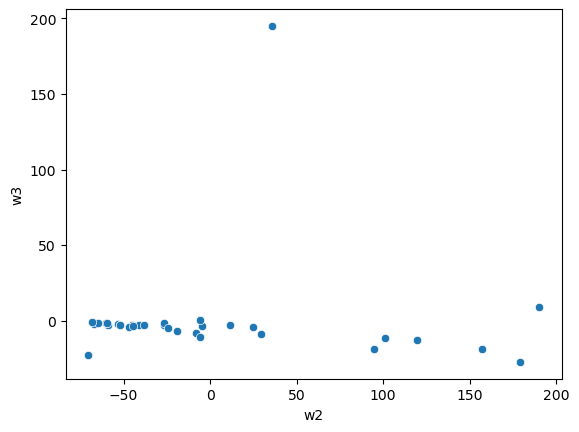

In [ ]:
# Plot histogram
sns.scatterplot(data=X_reduced_df, x="w2", y="w3")
# pandas
#X_df.plot.scatter(x='Por', y='TOC')
plt.show()

#### R Code done

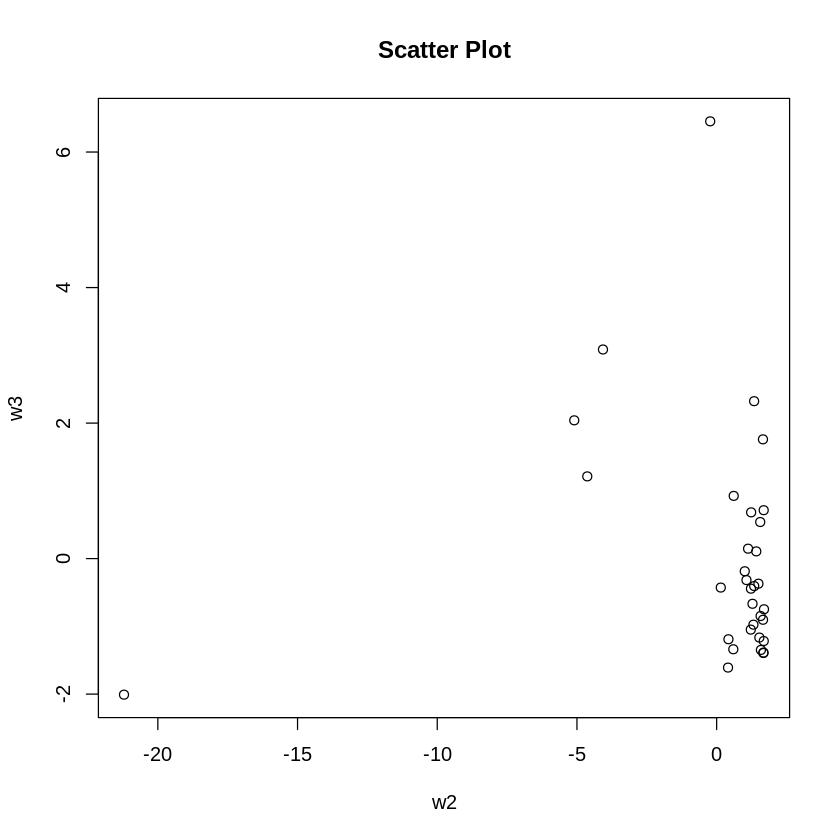

In [ ]:
x <- X_reduced_df$w2
y <- X_reduced_df$w3

# Create a scatter plot
plot(x, y, xlab = "w2", ylab = "w3", main = "Scatter Plot")